In [38]:
import pandas as pd
import numpy as np

from pipeline import vector_comparison

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, jaccard_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/training.csv', index_col = 0)
df = df.iloc[:10000] #need to limit rows while running on local machine.


testing = pd.read_csv('data/testing.csv', index_col = 0)


In [3]:
#standard model flow.
#obstatiate model object
model1 = vector_comparison(df)

#split the data into train and test portions
train, test = model1.split_data(['question1','question2'],'is_duplicate')

#fit all the training data to td-idf, default settings for this model
model1.fit_tfidf()

#transform test questions into two vectors
q1 = model1.transform_tfidf(test['question1'])
q2 = model1.transform_tfidf(test['question2'])

#calculates the cosine similarity results
results = model1.compute_cosine_similarity(q1,q2)

#appends y_pred to df for validation
model1.return_df_w_results(results)

#calculates model preformance statistics
model1.compute_confusion_matrix()
thresh, TPR1, FPR1 = model1.draw_roc()

model1.model_report()

94   140
842   1424


' TP:94, FP: 140, FN:842, TN: 1424 TPR: 0.10042735042735043, FPR: 0.9104859335038363, Accuracy: 0.6072, Precison: 0.4017094017094017'

In [8]:
#standard flow
model2 = vector_comparison(df)

train, test = model2.split_data(['question1','question2'],'is_duplicate')
model2.fit_tfidf(stopwords = 'english')
q1_model2 = model2.transform_tfidf(test['question1'])
q2_model2 = model2.transform_tfidf(test['question2'])
results_2 = model2.compute_cosine_similarity(q1_model2,q2_model2)
model2.return_df_w_results(results_2)
model2.compute_confusion_matrix()
thresh, TPR2, FPR2 = model2.draw_roc()
model2.model_report()

94   140
842   1424


' TP:94, FP: 140, FN:842, TN: 1424 TPR: 0.10042735042735043, FPR: 0.9104859335038363, Accuracy: 0.6072, Precison: 0.4017094017094017'

In [9]:
#standard flow
model3 = vector_comparison(df)

train, test = model3.split_data(['question1','question2'],'is_duplicate')
model3.fit_tfidf(ngram_range=(1,2))
q1_model3 = model3.transform_tfidf(test['question1'])
q2_model3 = model3.transform_tfidf(test['question2'])
results_3 = model3.compute_cosine_similarity(q1_model3,q2_model3)
model3.return_df_w_results(results_3)
model3.compute_confusion_matrix()
thresh, TPR3, FPR3 = model3.draw_roc()
model3.model_report()

183   195
753   1369


' TP:183, FP: 195, FN:753, TN: 1369 TPR: 0.1955128205128205, FPR: 0.8753196930946292, Accuracy: 0.6208, Precison: 0.48412698412698413'

In [10]:
model4 = vector_comparison(df)

train, test = model4.split_data(['question1','question2'],'is_duplicate')
model4.fit_tfidf(ngram_range=(1,2), max_df = 0.5)
q1_model4 = model4.transform_tfidf(test['question1'])
q2_model4 = model4.transform_tfidf(test['question2'])
results_4 = model4.compute_cosine_similarity(q1_model4,q2_model4)
model4.return_df_w_results(results_4)
model4.compute_confusion_matrix()
thresh, TPR4, FPR4 = model4.draw_roc()
model4.model_report()

193   201
743   1363


' TP:193, FP: 201, FN:743, TN: 1363 TPR: 0.20619658119658119, FPR: 0.8714833759590793, Accuracy: 0.6224, Precison: 0.48984771573604063'

In [11]:
model5 = vector_comparison(df)

train, test = model5.split_data(['question1','question2'],'is_duplicate')
model5.fit_tfidf(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model5 = model5.transform_tfidf(test['question1'])
q2_model5 = model5.transform_tfidf(test['question2'])
results_5 = model5.compute_cosine_similarity(q1_model5,q2_model5)
model5.return_df_w_results(results_5)
model5.compute_confusion_matrix()
thresh, TPR5, FPR5 = model5.draw_roc()
model5.model_report()

409   347
527   1217


' TP:409, FP: 347, FN:527, TN: 1217 TPR: 0.43696581196581197, FPR: 0.7781329923273658, Accuracy: 0.6504, Precison: 0.541005291005291'

In [12]:
#model 5 prime with PCA aka model6
model6 =vector_comparison(df)

#standard flow
train, test = model6.split_data(['question1','question2'],'is_duplicate')
model6.fit_tfidf(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model6 = model6.transform_tfidf(test['question1'])
q2_model6 = model6.transform_tfidf(test['question2'])

#add pca to the mix
model6.fit_pca(1000)
q1_model6 = model6.transform_pca(q1_model6)
q2_model6= model6.transform_pca(q2_model6)

#standard flow
results_6 = model6.compute_cosine_similarity(q1_model6,q2_model6)
model6.return_df_w_results(results_6)
model6.compute_confusion_matrix()
thresh, TPR6, FPR6 = model6.draw_roc()
model6.model_report()

552   423
384   1141


' TP:552, FP: 423, FN:384, TN: 1141 TPR: 0.5897435897435898, FPR: 0.729539641943734, Accuracy: 0.6772, Precison: 0.5661538461538461'

In [13]:
#validate best model with testing data


model6.df = testing #change the data frame to the testing data.
train, test = model6.split_data(['question1','question2'],'is_duplicate', test = True)
q1_model6 = model6.transform_tfidf(model6.df['question1'])
q2_model6 = model6.transform_tfidf(model6.df['question2'])
model6.compute_confusion_matrix()
thresh, TPR6v, FPR6v = model6.draw_roc()


In [14]:
#model7 is model5 with countvectorization instead of tfidf vectorization 


model7 =vector_comparison(df)

#standard flow
train, test = model7.split_data(['question1','question2'],'is_duplicate')

#swap count vectorization for tfidf vectorization
model7.fit_count(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model7 = model7.transform_count(test['question1'])
q2_model7 = model7.transform_count(test['question2'])

#add pca to the mix
model7.fit_pca(1000)
q1_model7 = model7.transform_pca(q1_model7)
q2_model7 = model7.transform_pca(q2_model7)

#standard flow
results_7 = model7.compute_cosine_similarity(q1_model7,q2_model7)
model7.return_df_w_results(results_7)
model7.compute_confusion_matrix()
thresh, TPR7, FPR7 = model7.draw_roc()
model7.model_report()


523   429
413   1135


' TP:523, FP: 429, FN:413, TN: 1135 TPR: 0.5587606837606838, FPR: 0.7257033248081841, Accuracy: 0.6632, Precison: 0.5493697478991597'

In [28]:
#model8 is model5 with count vectorization instead of TFIDF and jaccard distance instead of cosine simmilarity.

model8 =vector_comparison(df)

#standard flow
train, test = model8.split_data(['question1','question2'],'is_duplicate')

#swap count vectorization for tfidf vectorization
model8.fit_count(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model8 = model8.transform_count(test['question1'])
q2_model8 = model8.transform_count(test['question2'])

#swap jaccard similarity for cosine similarity
results_8 = model8.compute_jaccard_similarity(q1_model8,q2_model8, average = 'macro')

#standard flow
model8.return_df_w_results(results_8)
model8.compute_confusion_matrix()
thresh, TPR8, FPR8 = model8.draw_roc()
model8.model_report()


513   416
423   1148


' TP:513, FP: 416, FN:423, TN: 1148 TPR: 0.5480769230769231, FPR: 0.7340153452685422, Accuracy: 0.6644, Precison: 0.5522066738428417'

In [39]:
#grid search

parameters = {'ngram_range' : [(1,1), (1,2),(1,3), (1,4)], 'max_df' : [0.2, 0.4, 0.6, 0.8, 1],
              'min_df' : (1,2,3,4,5), 'max_features' : list(range(0,10000,2000))}


clf = GridSearchCV(model1, parameters)


In [42]:
#figure out grid search.

sklearn.model_selection._search.GridSearchCV

In [33]:
model5.final.head()

,question1,question2,is_duplicate,results
id,,,,
667,What is fermentation? What are some products o...,What are some fermented products?,0,1.000000
56745,What is it like to be newly wed?,What do newly weds do on their honeymoon?,0,0.889139
88223,What are some of the best IAS coaching institu...,What are some of the best IAS coaching institu...,0,0.850788
81125,How can you stay motivated through whatever?,How do I stay motivated and achieve my goals w...,0,0.703388
218129,Which Scandinavian country is the best to stud...,"How common is it for people to ask you ""descri...",0,0.000000


In [17]:
model8.final.head()

,question1,question2,is_duplicate,results
id,,,,
667,What is fermentation? What are some products o...,What are some fermented products?,0,1.000000
56745,What is it like to be newly wed?,What do newly weds do on their honeymoon?,0,0.999750
88223,What are some of the best IAS coaching institu...,What are some of the best IAS coaching institu...,0,0.999500
81125,How can you stay motivated through whatever?,How do I stay motivated and achieve my goals w...,0,0.999500
218129,Which Scandinavian country is the best to stud...,"How common is it for people to ask you ""descri...",0,0.995012


Text(0.5, 1.0, 'Model Performance')

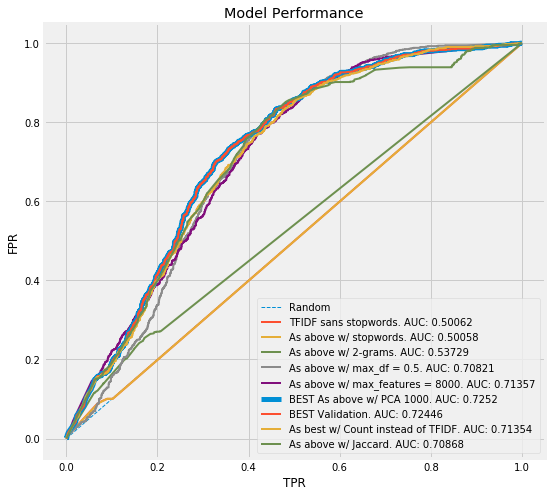

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot([0,1], label = 'Random', linestyle='dashed', linewidth = 1)
ax.plot(FPR2,TPR2, label = f'TFIDF sans stopwords. AUC: {model2.roc_auc_score}',linewidth=2)
ax.plot(FPR1,TPR1, label = f'As above w/ stopwords. AUC: {model1.roc_auc_score}',linewidth=2)
ax.plot(FPR3,TPR3, label = f'As above w/ 2-grams. AUC: {model3.roc_auc_score}',linewidth=2)
ax.plot(FPR4,TPR4, label = f'As above w/ max_df = 0.5. AUC: {model4.roc_auc_score}',linewidth=2)
ax.plot(FPR5,TPR5, label = f'As above w/ max_features = 8000. AUC: {model5.roc_auc_score}',linewidth=2)
ax.plot(FPR6,TPR6, label = f'BEST As above w/ PCA 1000. AUC: 0.7252',linewidth=5)

ax.plot(FPR6v,TPR6v, label = f'BEST Validation. AUC: {model6.roc_auc_score}',linewidth=2)
ax.plot(FPR7,TPR7, label = f'As best w/ Count instead of TFIDF. AUC: {model7.roc_auc_score}',linewidth=2)
ax.plot(FPR8,TPR8, label = f'As above w/ Jaccard. AUC: {model8.roc_auc_score}',linewidth=2)

plt.xlabel('TPR')
plt.ylabel('FPR')

plt.legend(loc="lower right")
plt.title("Model Performance")

#plt.savefig('ModelPreformance.png')

In [19]:


model6.final.to_csv('data/model6.csv')

In [20]:
model6.final.loc[125261][0]

'Is there any real proof of ghosts?'

In [21]:
model6.final.loc[125261][1]

'Is there any proof that ghosts are real?'

In [22]:
model6.final.loc[125261]

question1             Is there any real proof of ghosts?
question2       Is there any proof that ghosts are real?
is_duplicate                                           1
results                                                1
Name: 125261, dtype: object